In [ ]:
import torch
print(torch.cuda.is_available())
print(torch.cuda.get_device_name(0))

True
Tesla T4


In [ ]:
!pip -q install diffusers transformers accelerate torch torchvision safetensors

In [ ]:
import torch
from diffusers import StableDiffusionPipeline

model_id = "runwayml/stable-diffusion-v1-5"

pipe = StableDiffusionPipeline.from_pretrained(
    model_id,
    torch_dtype=torch.float16
)

pipe = pipe.to("cuda")
pipe.safety_checker = None  # faster for now

print("✅ Model loaded")

Flax classes are deprecated and will be removed in Diffusers v1.0.0. We recommend migrating to PyTorch classes or pinning your version of Diffusers.
Flax classes are deprecated and will be removed in Diffusers v1.0.0. We recommend migrating to PyTorch classes or pinning your version of Diffusers.
/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

Loading weights:   0%|          | 0/396 [00:00<?, ?it/s]

StableDiffusionSafetyChecker LOAD REPORT from: /root/.cache/huggingface/hub/models--runwayml--stable-diffusion-v1-5/snapshots/451f4fe16113bff5a5d2269ed5ad43b0592e9a14/safety_checker
Key                                               | Status     |  | 
--------------------------------------------------+------------+--+-
vision_model.vision_model.embeddings.position_ids | UNEXPECTED |  | 

Notes:
- UNEXPECTED	:can be ignored when loading from different task/architecture; not ok if you expect identical arch.


Loading weights:   0%|          | 0/196 [00:00<?, ?it/s]

CLIPTextModel LOAD REPORT from: /root/.cache/huggingface/hub/models--runwayml--stable-diffusion-v1-5/snapshots/451f4fe16113bff5a5d2269ed5ad43b0592e9a14/text_encoder
Key                                | Status     |  | 
-----------------------------------+------------+--+-
text_model.embeddings.position_ids | UNEXPECTED |  | 

Notes:
- UNEXPECTED	:can be ignored when loading from different task/architecture; not ok if you expect identical arch.


✅ Model loaded


In [ ]:
prompt = "modern streetwear graphic for black hoodie, minimal, vector style"

images = pipe(
    prompt,
    num_images_per_prompt=5,
    num_inference_steps=25,
    guidance_scale=7.5
).images

print("✅ Images generated:", len(images))

  0%|          | 0/25 [00:00<?, ?it/s]

✅ Images generated: 5


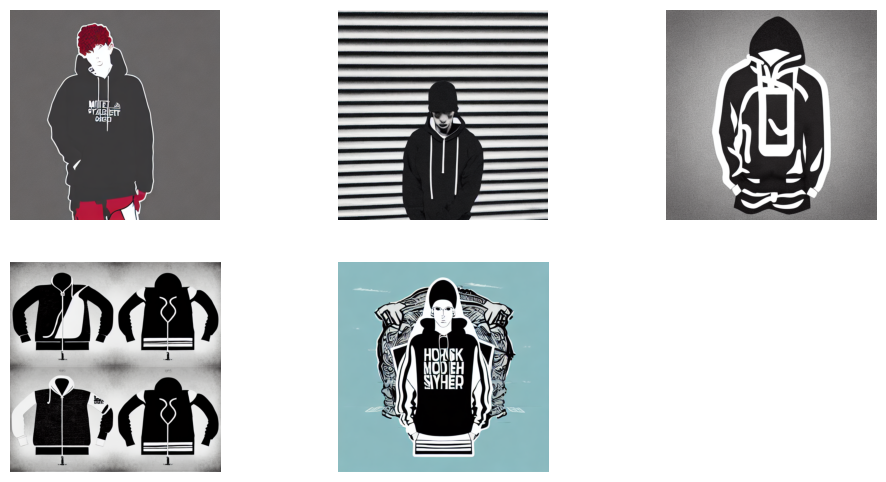

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))

for i, img in enumerate(images):
    plt.subplot(2,3,i+1)
    plt.imshow(img)
    plt.axis("off")

plt.show()

In [ ]:
import os

output_dir = "generated_designs"
os.makedirs(output_dir, exist_ok=True)

paths = []

for i, img in enumerate(images):
    path = f"{output_dir}/design_{i+1}.png"
    img.save(path)
    paths.append(path)

print("✅ Saved to:", paths)

NameError: name 'images' is not defined

In [ ]:
from google.colab import files

files.download(paths[0])  # test download

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
prompt = (
    "high quality vector graphic for hoodie print, modern streetwear design, "
    "bold minimal, centered composition, professional fashion print, "
    "clean sharp lines, trendy dribbble style, screen print ready"
)

negative_prompt = (
    "blurry, low quality, distorted, messy, realistic photo, "
    "3d render, watermark, text, shadow, gradient background"
)

images = pipe(
    prompt,
    negative_prompt=negative_prompt,
    num_images_per_prompt=5,
    num_inference_steps=28,
    guidance_scale=8
).images

print("✅ Images generated:", len(images))

  0%|          | 0/28 [00:00<?, ?it/s]

✅ Images generated: 5


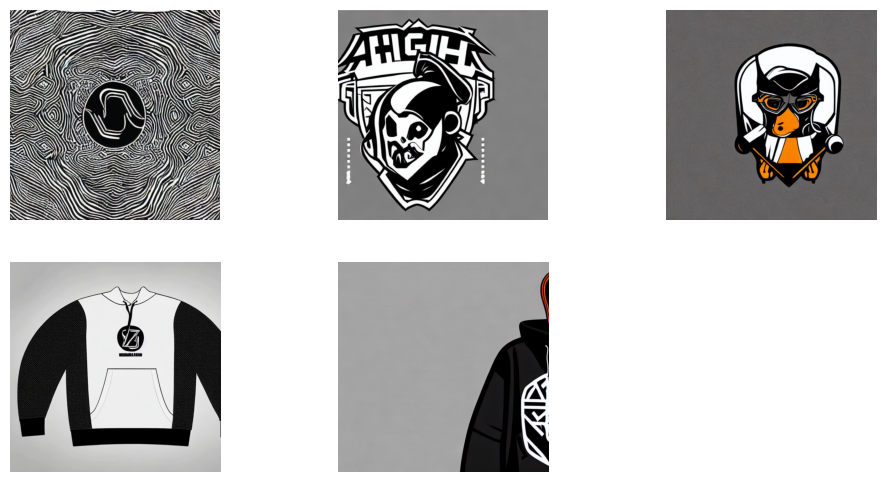

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))

for i, img in enumerate(images):
    plt.subplot(2,3,i+1)
    plt.imshow(img)
    plt.axis("off")

plt.show()

In [ ]:
prompt = (
    "centered vector graphic for t-shirt print, streetwear brand logo design, "
    "bold clean minimal, symmetrical composition, high contrast, "
    "professional screen print artwork, isolated on plain white background, "
    "no mockup, no clothing, flat design, dribbble style, behance style"
)

negative_prompt = (
    "hoodie, t-shirt, person, model, mockup, photo, realistic, 3d render, "
    "blurry, low quality, messy background, gradient background, shadow, "
    "wrinkles, fabric texture, watermark, text paragraph"
)

images = pipe(
    prompt,
    negative_prompt=negative_prompt,
    num_images_per_prompt=5,
    num_inference_steps=32,
    guidance_scale=8.5,
    height=512,
    width=512
).images

print("✅ Images generated:", len(images))

  0%|          | 0/32 [00:00<?, ?it/s]

✅ Images generated: 5


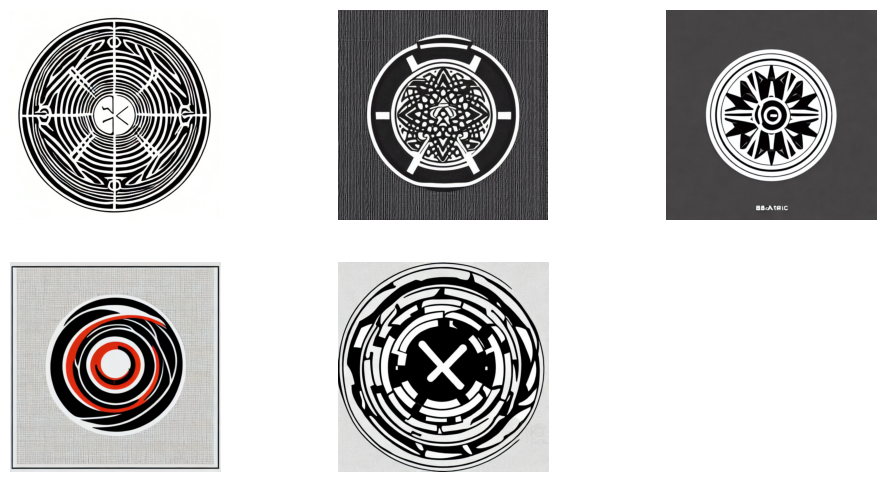

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))

for i, img in enumerate(images):
    plt.subplot(2,3,i+1)
    plt.imshow(img)
    plt.axis("off")

plt.show()

In [ ]:
from diffusers import DPMSolverMultistepScheduler

# better scheduler
pipe.scheduler = DPMSolverMultistepScheduler.from_config(pipe.scheduler.config)

prompt = (
    "premium streetwear brand logo, clean vector t-shirt print, "
    "highly detailed, sharp edges, bold graphic design, centered composition, "
    "professional screen print artwork, modern hypebeast style, "
    "minimal but striking, isolated on white background"
)

negative_prompt = (
    "mockup, hoodie, person, photo, realistic fabric, blurry, "
    "low quality, messy, gradient background, wrinkles, watermark"
)

images = pipe(
    prompt,
    negative_prompt=negative_prompt,
    num_images_per_prompt=5,
    num_inference_steps=50,   # ⬅️ MUCH higher quality
    guidance_scale=9,
    height=640,               # ⬅️ higher resolution
    width=640
).images

print("✅ Images generated:", len(images))

  0%|          | 0/50 [00:00<?, ?it/s]

✅ Images generated: 5


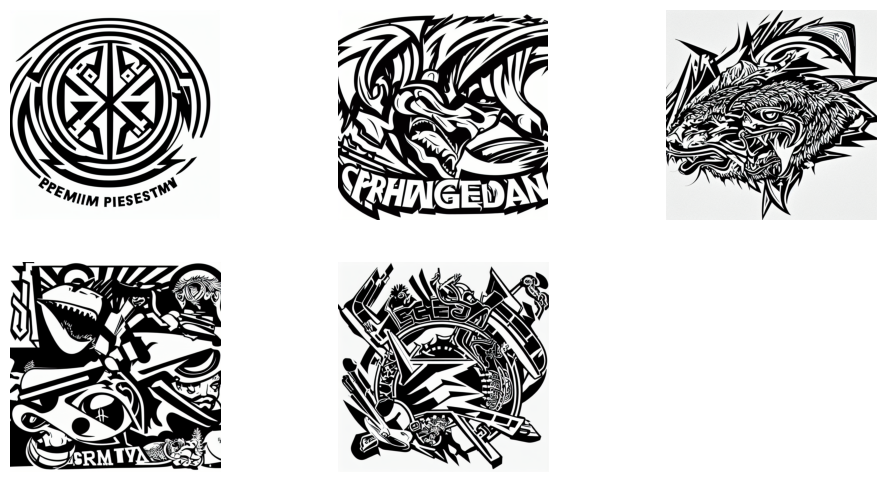

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))

for i, img in enumerate(images):
    plt.subplot(2,3,i+1)
    plt.imshow(img)
    plt.axis("off")

plt.show()

**AI** **Recommender**

In [ ]:
!pip -q install sentence-transformers scikit-learn

In [ ]:
import json

products = [
    {
        "id": 1,
        "name": "Black Oversized Streetwear Hoodie",
        "price": 899,
        "image": "https://example.com/hoodie1.jpg",
        "tags": "black oversized hoodie streetwear cotton minimal"
    },
    {
        "id": 2,
        "name": "Minimal Graphic Print T-Shirt",
        "price": 499,
        "image": "https://example.com/tshirt1.jpg",
        "tags": "white t-shirt minimal graphic print streetwear"
    },
    {
        "id": 3,
        "name": "Urban Logo Print Hoodie",
        "price": 999,
        "image": "https://example.com/hoodie2.jpg",
        "tags": "urban logo hoodie black hypebeast streetwear"
    },
    {
        "id": 4,
        "name": "Casual Cotton Printed Tee",
        "price": 399,
        "image": "https://example.com/tshirt2.jpg",
        "tags": "casual cotton t-shirt printed daily wear"
    },
    {
        "id": 5,
        "name": "Premium Streetwear Graphic Hoodie",
        "price": 1199,
        "image": "https://example.com/hoodie3.jpg",
        "tags": "premium hoodie graphic streetwear bold"
    },
    {
        "id": 6,
        "name": "Minimal Logo White T-Shirt",
        "price": 549,
        "image": "https://example.com/tshirt3.jpg",
        "tags": "white minimal logo t-shirt clean fashion"
    }
]

print("✅ Product dataset ready:", len(products))

✅ Product dataset ready: 6


In [ ]:
from sentence_transformers import SentenceTransformer
import numpy as np

model = SentenceTransformer("all-MiniLM-L6-v2")

print("✅ Embedding model loaded")

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

Loading weights:   0%|          | 0/103 [00:00<?, ?it/s]

BertModel LOAD REPORT from: sentence-transformers/all-MiniLM-L6-v2
Key                     | Status     |  | 
------------------------+------------+--+-
embeddings.position_ids | UNEXPECTED |  | 

Notes:
- UNEXPECTED	:can be ignored when loading from different task/architecture; not ok if you expect identical arch.


tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

✅ Embedding model loaded


In [ ]:
product_texts = [p["tags"] for p in products]
product_embeddings = model.encode(product_texts)

print("✅ Product embeddings created:", product_embeddings.shape)

✅ Product embeddings created: (6, 384)


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

def recommend_products(user_prompt, top_k=5):
    # embed user query
    query_embedding = model.encode([user_prompt])

    # compute similarity
    similarities = cosine_similarity(query_embedding, product_embeddings)[0]

    # get top indices
    top_indices = similarities.argsort()[-top_k:][::-1]

    # return matched products
    results = []
    for idx in top_indices:
        product = products[idx].copy()
        product["similarity_score"] = float(similarities[idx])
        results.append(product)

    return results

print("✅ Recommender ready")

✅ Recommender ready


In [ ]:
test_prompt = "black streetwear hoodie with bold graphic"

results = recommend_products(test_prompt, top_k=5)

for r in results:
    print(r["name"], "→ score:", round(r["similarity_score"], 3))

Premium Streetwear Graphic Hoodie → score: 0.899
Urban Logo Print Hoodie → score: 0.752
Black Oversized Streetwear Hoodie → score: 0.63
Minimal Graphic Print T-Shirt → score: 0.5
Minimal Logo White T-Shirt → score: 0.404


In [ ]:
def generate_fashion_results(user_prompt):
    print("🎨 Generating designs...")

    # ---- IMAGE GENERATION ----
    images = pipe(
        user_prompt,
        negative_prompt=negative_prompt,
        num_images_per_prompt=5,
        num_inference_steps=50,
        guidance_scale=9,
        height=640,
        width=640
    ).images

    # ---- SAVE IMAGES ----
    import os
    output_dir = "generated_designs"
    os.makedirs(output_dir, exist_ok=True)

    image_paths = []
    for i, img in enumerate(images):
        path = f"{output_dir}/design_{i+1}.png"
        img.save(path)
        image_paths.append(path)

    print("🧠 Finding similar products...")

    # ---- PRODUCT RECOMMENDATION ----
    recommended_products = recommend_products(user_prompt, top_k=5)

    return {
        "generated_images": image_paths,
        "recommended_products": recommended_products
    }

print("✅ Unified pipeline ready")

✅ Unified pipeline ready


In [ ]:
result = generate_fashion_results(
    "premium black streetwear hoodie with bold minimal logo"
)

print("\n📦 Generated Images:")
for p in result["generated_images"]:
    print(p)

print("\n🛍 Recommended Products:")
for prod in result["recommended_products"]:
    print(prod["name"], "₹", prod["price"])

🎨 Generating designs...


NameError: name 'negative_prompt' is not defined

**FastAPI Backend**

In [ ]:
!pip -q install fastapi uvicorn nest-asyncio pyngrok

In [ ]:
import os, uuid, nest_asyncio, threading, time
from PIL import Image, ImageDraw, ImageFont
from fastapi import FastAPI
from fastapi.middleware.cors import CORSMiddleware
from pydantic import BaseModel
from fastapi.staticfiles import StaticFiles
from pyngrok import ngrok
import uvicorn

nest_asyncio.apply()

# ---------- folder ----------
os.makedirs("generated_designs", exist_ok=True)

# ---------- FastAPI ----------
app = FastAPI(title="AI Fashion Generator API")

app.add_middleware(
    CORSMiddleware,
    allow_origins=["*"],
    allow_credentials=True,
    allow_methods=["*"],
    allow_headers=["*"],
)

app.mount("/generated_designs",
          StaticFiles(directory="generated_designs"),
          name="generated_designs")

class PromptRequest(BaseModel):
    prompt: str

# ---------- generator ----------
def generate_fashion_results(prompt: str):
    global pipe
    filenames = []

    print("🎨 Using diffusion model...")

    # generate 3 images
    for i in range(5):
        image = pipe(prompt).images[0]

        fname = f"{uuid.uuid4().hex}.png"
        path = os.path.join("generated_designs", fname)

        image.save(path)

        filenames.append(f"generated_designs/{fname}")

    products = [
        {"id": 1, "name": "Black Hoodie", "price": 699},
        {"id": 2, "name": "Graphic Tee", "price": 399},
    ]

    return {
        "generated_images": filenames,
        "recommended_products": products
    }

# ---------- endpoint ----------
@app.post("/generate")
def generate_endpoint(data: PromptRequest):
    return generate_fashion_results(data.prompt)

# ---------- ngrok ----------
ngrok.set_auth_token("3A45xWOTlvHkZOQwrteeieqEY0N_3anHhJfWeXJR1fiae9xmr")  # optional
public_url = ngrok.connect(8000)
print("🌐 Public URL:", public_url)

def run_server():
    uvicorn.run(app, host="0.0.0.0", port=8000)

thread = threading.Thread(target=run_server, daemon=True)
thread.start()
time.sleep(1)

print("✅ Server running")

🌐 Public URL: NgrokTunnel: "https://sharla-phleboid-tonita.ngrok-free.dev" -> "http://localhost:8000"


INFO:     Started server process [3881]
INFO:     Waiting for application startup.
INFO:     Application startup complete.
INFO:     Uvicorn running on http://0.0.0.0:8000 (Press CTRL+C to quit)


✅ Server running


In [ ]:
print(pipe)

StableDiffusionPipeline {
  "_class_name": "StableDiffusionPipeline",
  "_diffusers_version": "0.36.0",
  "_name_or_path": "runwayml/stable-diffusion-v1-5",
  "feature_extractor": [
    "transformers",
    "CLIPImageProcessor"
  ],
  "image_encoder": [
    null,
    null
  ],
  "requires_safety_checker": true,
  "safety_checker": [
    null,
    null
  ],
  "scheduler": [
    "diffusers",
    "PNDMScheduler"
  ],
  "text_encoder": [
    "transformers",
    "CLIPTextModel"
  ],
  "tokenizer": [
    "transformers",
    "CLIPTokenizer"
  ],
  "unet": [
    "diffusers",
    "UNet2DConditionModel"
  ],
  "vae": [
    "diffusers",
    "AutoencoderKL"
  ]
}



In [1]:
!zip -r ai-fashion-backend.zip /content/ai-fashion

	zip warning: name not matched: /content/ai-fashion

zip error: Nothing to do! (try: zip -r ai-fashion-backend.zip . -i /content/ai-fashion)
